In [73]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [45]:
import pandas as pd
df_train=pd.read_csv("C:/Users/pcc/Downloads/SalaryData_Train.csv")
df_test=pd.read_csv("C:/Users/pcc/Downloads/SalaryData_Test.csv")
print(df_train.head())
print(df_test.head())

   age          workclass   education  educationno  ... capitalloss hoursperweek          native  Salary
0   39          State-gov   Bachelors           13  ...           0           40   United-States   <=50K
1   50   Self-emp-not-inc   Bachelors           13  ...           0           13   United-States   <=50K
2   38            Private     HS-grad            9  ...           0           40   United-States   <=50K
3   53            Private        11th            7  ...           0           40   United-States   <=50K
4   28            Private   Bachelors           13  ...           0           40            Cuba   <=50K

[5 rows x 14 columns]
   age   workclass      education  educationno  ... capitalloss hoursperweek          native  Salary
0   25     Private           11th            7  ...           0           40   United-States   <=50K
1   38     Private        HS-grad            9  ...           0           50   United-States   <=50K
2   28   Local-gov     Assoc-acdm           

In [46]:
print(df_train.shape)
print(df_test.shape)

(30161, 14)
(15060, 14)


In [47]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64
age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


In [48]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dty

In [29]:
for  i in df.columns:
    if df[i].dtypes=='object':
        print(df[i].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [49]:
print(df_train.columns)
print(df_test.columns)

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')
Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')


In [37]:
for i in df.columns:
    if df[i].dtype=="object":
        print(i,"=Category")
    else:
        print(i,"Numeric")

age Numeric
workclass =Category
education =Category
educationno Numeric
maritalstatus =Category
occupation =Category
relationship =Category
race =Category
sex =Category
capitalgain Numeric
capitalloss Numeric
hoursperweek Numeric
native =Category
Salary =Category


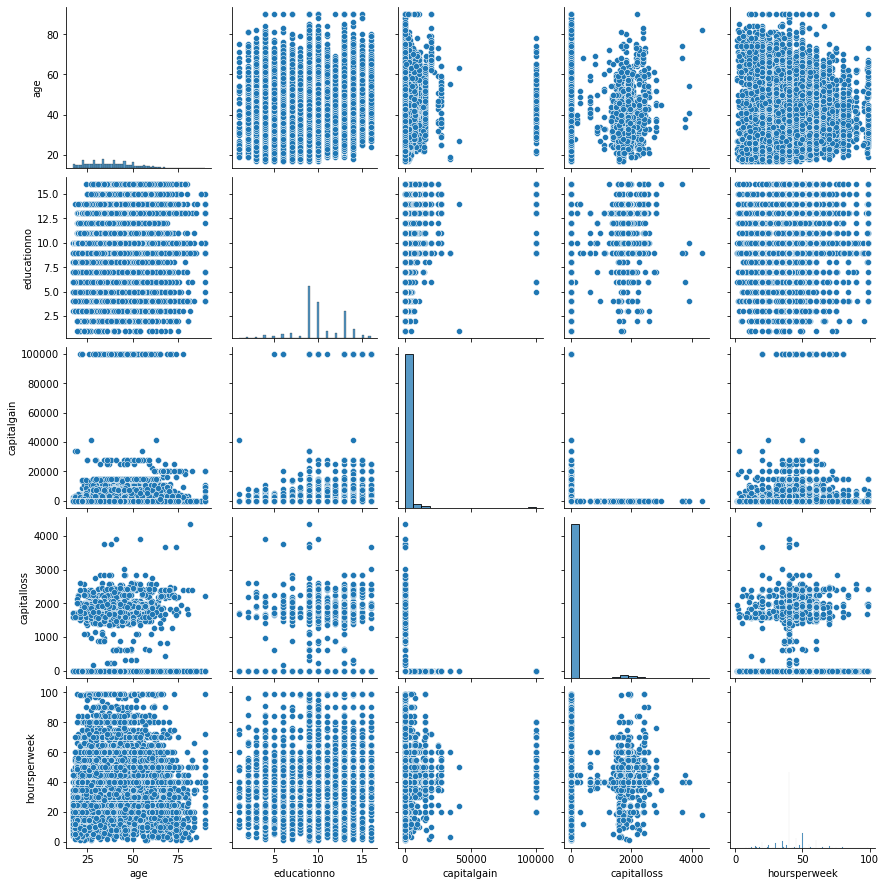

In [39]:
sns.pairplot(df)

In [50]:
lb=LabelEncoder()
df_train[["workclass","education","maritalstatus",
         "occupation","relationship","race","sex","native","Salary"]]=df_train[["workclass","education","maritalstatus",
          "occupation","relationship","race","sex","native","Salary"]].apply(lb.fit_transform)

In [52]:
lb=LabelEncoder()
df_test[["workclass","education","maritalstatus",
         "occupation","relationship","race","sex","native","Salary"]]=df_test[["workclass","education","maritalstatus",
          "occupation","relationship","race","sex","native","Salary"]].apply(lb.fit_transform)

In [53]:
print(df_train.head())
print(df_test.head())

   age  workclass  education  educationno  maritalstatus  ...  capitalgain  capitalloss  hoursperweek  native  Salary
0   39          5          9           13              4  ...         2174            0            40      37       0
1   50          4          9           13              2  ...            0            0            13      37       0
2   38          2         11            9              0  ...            0            0            40      37       0
3   53          2          1            7              2  ...            0            0            40      37       0
4   28          2          9           13              2  ...            0            0            40       4       0

[5 rows x 14 columns]
   age  workclass  education  educationno  maritalstatus  ...  capitalgain  capitalloss  hoursperweek  native  Salary
0   25          2          1            7              4  ...            0            0            40      37       0
1   38          2         11     

In [57]:
x_train=df_train.iloc[:,:-1]
y_train=df_train.iloc[:,-1]
x_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[:,-1]

In [58]:
# Naive Bayes classification using multinomial 
cl_mb=MB()
cl_mb.fit(x_train,y_train)

MultinomialNB()

In [59]:
pred_mb=cl_mb.predict(x_test)
pred_mb

array([0, 0, 0, ..., 0, 1, 0])

In [74]:
accuracy_score(y_test,pred_mb)

0.7749667994687915

In [61]:
print(classification_report(y_test,pred_mb))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



In [86]:
cm=confusion_matrix(y_test,pred_mb)
cm

array([[10891,   469],
       [ 2920,   780]], dtype=int64)

<AxesSubplot:>

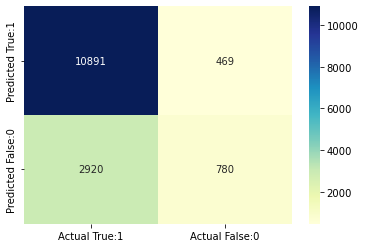

In [72]:
conf_matrix=pd.DataFrame(data=cm,columns=["Actual True:1",'Actual False:0'],
                                         index=["Predicted True:1","Predicted False:0"])

sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='d' )

In [78]:
# Naive Bayes classification using Guassian 
cl_gb=GB()
cl_gb.fit(x_train,y_train)

GaussianNB()

In [80]:
pred_gb=cl_gb.predict(x_test)

In [81]:
accuracy_score(y_test,pred_gb)

0.7946879150066402

In [82]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



In [85]:
cm1=confusion_matrix(y_test,pred_gb)
cm1

array([[10759,   601],
       [ 2491,  1209]], dtype=int64)

<AxesSubplot:>

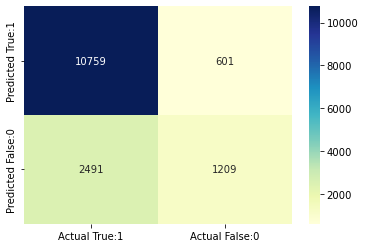

In [84]:
conf_matrix=pd.DataFrame(data=cm1,columns=["Actual True:1",'Actual False:0'],
                                         index=["Predicted True:1","Predicted False:0"])

sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='d' )